> **AutoGen Docs**
https://microsoft.github.io/autogen/0.2/docs/Getting-Started



# Getting Started

**AutoGen**은 **AI 에이전트를 구축**하고, **여러 에이전트 간의 협업**을 통해 과제를 해결할 수 있도록 지원하는 **오픈소스 프로그래밍 프레임워크**이다. 
AutoGen의 목표는 **에이전트 기반(agentic AI)** 개발과 연구를 더 빠르고 유연하게 진행할 수 있도록 PyTorch가 딥러닝에 그러하듯 **쉽고 강력한 프레임워크를 제공하는 것**이다. 
AutoGen은 다음과 같은 주요 기능을 제공한다.

- **converse with other agents** (에이전트 간의 대화 기능)
- **LLM and Tool use support** (LLM 및 다양한 도구 활용 지원)
- **autonomous and human-in-the loop workflows** (완전 자율형 및 인간 개입형(human-in-the-loop) 워크플로우
- **multi-agent conversation patterns** (다중 에이전트 간 대화 패턴 구성)

쉽게 말해 **AutoGen은 여러 AI들이 서로 협업해서 문제를 해결하는 시스템을 손쉽게 만들 수 있게 도와주는 툴**이다. 


아래의 그림은 에이전트 기반 대화 시스템에서 **Agent Customization(에이전트 커스터마이징)**,  **Multi-Agent Conversations(다중 에이전트 대화)**, **Flexible Conversation Patterns(유연한 대화 패턴)**을 설명하는 것이다. 

![](https://velog.velcdn.com/images/heyggun/post/018c14f4-8303-4f60-8d20-22e52eaba83c/image.png)


위 그림에서 보면 좌측 상단에 **`Conversable agent`** 가 나오는데, AutoGen에서 가장 기본이 되는 **'말할 수 있는 에이전트(대화 가능한 에이전트)'** 이다. 
이 에이전트는 다른 에이전트와 메시지를 주고받을 수 있고, 주어진 역할(system message)에 따라 대화에 참여하며, LLM을 기반으로 자기 답변을 생성한다. 

아래에 두 개의 분리된 박스가 있고, 이는 **`Agent Customization`**(에이전트 커스터마이징)을 의미한다. 왼쪽의 파란 박스는 기본 OpenAI 기반의 챗봇 에이전트이고 오른쪽 녹색 박스는 python 코드와 사용자 정의 아이콘이 추가된 커스텀 에이전트이다.

즉, 에이전트는 기본 모델을 기반으로 **개별 사용자 목적에 맞게 확장 가능하다**는 의미이다.


오른쪽 상단의 **`Multi-Agent Conversations`** 은 다중 에이전트 대화로, 파란색 에이전트와 초록 에이전트가 양방향 화살표로 연결되어 있다. 이것은 서로 다른 기능을 가진 두 에이전트가 동시에 협업하여 대화에 참여할 수 있다는 것을 보여준다. 예를 들면 하나는 언어 번역, 하나는 데이터 분석이 될 수 있다. 

오른쪽 하단의 **`Flexible Conversation Patterns`** (유연한 대화 패턴)은 두 가지 하위 패턴으로 나뉘고 있는데 (1) `Joint chat` (공동 대화)로 여러 에이전트가 동등한 관계로 서로 사용자와 같이 대화한다. 화살표가 모든 방향으로 연결된 모습에서 협업적 구조가 보인다.
(2) `Hierarchical chat`(계층형 대화)는 하나의 상위 에이전트가 여러 하위 에이전트를 조율한다. 각 하위 에이전트는 특정한 기능이나 도메인을 담당하고, 상위 에이전트가 이를 통합해서 사용자와 소통한다. 에를 들면 메인 에이전트가 "문서 요약 요청"을 받아 하위 에이전트들에게 각 파트를 나눠 수행하게 하는 것이다.


---
즉 정리해보자면

1. **Agent Customization**	 : 에이전트를 사용자의 목적에 맞게 확장 가능
2. **Multi-Agent Conversations** : 여러 에이전트 간 상호작용이 가능한 구조
3. **Flexible Conversation Patterns** : 공동 or 계층형 구조로 유연한 대화 흐름 지원

하는 것이다. 각 개념에 대한 실제 활용 시나리오를 들어서 구체적인 사례를 살펴 보자. 

#### `1. Agent Customization (에이전트 커스터마이징)`
기본 에이전트를 사용자가 목적에 맞게 수정하거나 확장하는 것이다.
예를 들면 **고객 응대 에이전트**를 예로 들 수 있는데, 기본 GPT 에이전트에 고객 응대 스크립트, 회사 정책, FAQ 데이터를 넣어서 특정 기업용 챗봇으로 커스터마이징 하는 것이다. "배송 지연 관련 문의는 이렇게 답변하세요" 등의 템플릿을 적용할 수 있다.
**코딩 도우미 에이전트**로는 GPT 기반에 python 실행 환경을 연동시켜서 코드 작성 + 실행 + 디버깅까지 가능하게 확장하는 것이다. "이 함수 성능 개선해줘" 라고 했을 때, 코드도 분석하고 결과도 직접 실행해서 보여줄 수 있다.

#### `2. Multi-Agent Conversations (다중 에이전트 대화)`
서로 다른 역할을 가진 에이전트들이 동시에 하나의 대화에 참여하는 것이다.
예를 들면 **번역+요약 이중 에이전트**가 있는데, 사용자가 문서를 업로드하면 번역 에이전트가 외국어 문서를 한국어로 번역하고, 요약 에이전트가 번역된 결과를 핵심 요약하는 것이다.
즉, 두 에이전트가 대화를 주고받으며 작업을 분담하는 것이다.
**대화형 코드 리뷰 에이전트**로는 한 에이전트는 코드 스타일 체크, 다른 에이전트는 보안 문제 점검, 또 다른 에이전트는 성능 개선을 제안하는 것이다. 사용자는 하나의 대화창에서 각기 다른 피드백을 실시간으로 받는다.

#### `3. Flexible Conversation Patterns (유연한 대화 패턴)` 
유연한 대화 패턴으로는 `joint Chat(공동 대화)`, `Hierarchical Chat(계층형 대화)`가 있다.

`joint chat`은 에이전트들 간의 평등한 협업 구조로 
**협업 디자인 에이전트**를 만든다면, 한 에이전트는 UI 스타일 가이드를 담당, 다른 에이전트는 UX 피드백을 분석해서 사용자는 두 에이전트와 함께 대화하며 디자인 방향을 결정하는 것이다. 

`Hierarchical Chat` 은 하나의 마스터 에이전트가 여러 하위 에이전트를 통제하는 구조이다. 예를 들어 **프로젝트 메니저 에이전트**를 만든다면 메인 에이전트가 사용자의 명령을 받아, 일정 계획, 예산 검토, 인력 배치를 해야할 때 일정 계획으로 타임라인 에이전트를 호출하고 예산을 검토하기 위해 재무 분석 에이전트를 호출하고 인력 배치를 위해 인사 담당 에이전트를 호출하는 것이다. 그리고 결과를 통합해서 사용자에게 종합으로 보고한다.
**리서치 논문 요약 에이전트**를 만든다면, 메인 에이전트가 논문 요약해줘. 라는 요청을 받았을 때 1장~5장 까지 각각의 하위 에이전트에 분산 처리해서 각 요약 결과를 취합해 하나의 통합 요약을 생성하는 것이다. 


---

## Main Features (주요 기능)

- AutoGen은 **multi-agent conversations(다중 에이전트 대화)** 기반의 차세대 LLM 애플리케이션을 적은 노력으로 쉽게 구축할 수 있도록 지원한다. 복잡한 LLM 워크플로우의 **`orchestration(오케스트레이션, 조율)`**, **`automation(자동화)`**, **`optimization(최적화)`**를 단순화해서 LLM 모델의 성능을 극대화하고 약점을 보완할 수 있게 한다. 

- AutoGen은 복잡한 워크플로우를 위한 **diverse conversation patterns(다양한 대화패턴)**도 지원한다.

- AutoGen은 실제 작동하는 다양한 예제 시스템들을 제공한다. 이 시스템들은 다양한 분야와 복잡성을 가지고 있다. AutoGen이 얼마나 쉽게 다양한 대화 패턴을 지언할 수 있는지를 보여준다. 


> `Multi-Agent conversation`, `diverse conversation patterns`, `wide range of applications`에 대해서는 Tutorial 섹션 후에 **Use Cases** 섹션의 **Multi-agent Conversation Framework**에서 자세히 다뤄보겠다. 

이러한 AutoGen은 Microsoft, Penn state University(펜실베이니아 주립대), University of Washington(워싱턴 대학교)의 공동 연구를 기반으로 만들어졌다. 

## QuickStart

v.0.2를 기준으로 하였기 때문에 autogen-agentchat을 0.2로 맞췄다. 
```python
pip install autogen-agentchat~=0.2
```

여기서는 `no code execution`, `local execution`, `Docker execution` 총 세 가지의 모드가 나온다.
`no code execution`은 에이전트가 코드를 짜긴 하지만 실행을 하지는 않고, LLM이 이런 코드는 어때? 하고 제안만 하고 끝나는 것
`local execution`은 에이전트가 만든 코드를 내 컴퓨터에서 직접 실행할 때
`Docker execution`은 코드를 도커 컨테이너 안에서 안전하게 실행할 때 사용한다. 이 경우는 시스템 분리나 보안상 이유로 유용하다.


In [1]:
pip install autogen-agentchat~=0.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from autogen import AssistantAgent, UserProxyAgent

In [3]:
from config import settings

api_key = settings.openai_api_key.get_secret_value()

In [4]:
llm_config = {
    "config_list":
        [
            {
                "model" : "gpt-4o-mini",
                "api_key" : api_key
            }
        ]
}

**No code execution**

In [5]:
assistant = AssistantAgent("assistant",llm_config=llm_config)
user_proxy = UserProxyAgent("user_proxy", code_execution_config=False)

# start the chat
user_proxy.initiate_chat(
    assistant,
    message="NVDA나 TESLA 주식 가격에 대한 농담을 해봐",
    max_turns=1
)

user_proxy (to assistant):

NVDA나 TESLA 주식 가격에 대한 농담을 해봐

--------------------------------------------------------------------------------
assistant (to user_proxy):

주식 시장에서 NVDA와 TESLA 이야기를 하자면, 이렇게 농담할 수 있겠네요:

"NVDA 주식을 사면, 그래픽보다 더 선명한 미래를 볼 수 있다던데... TESLA 주식을 사면 차가 도로를 달리는 대신 주식이 더 빨리 상승하길 바랄 수 있겠죠!"

주식 시장은 진지하니 가끔은 이렇게 웃어넘기는 것도 좋겠네요! 

TERMINATE

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (d0b2e212-d426-4fb0-8f77-002097fa0847): Maximum turns (1) reached


ChatResult(chat_id=None, chat_history=[{'content': 'NVDA나 TESLA 주식 가격에 대한 농담을 해봐', 'role': 'assistant', 'name': 'user_proxy'}, {'content': '주식 시장에서 NVDA와 TESLA 이야기를 하자면, 이렇게 농담할 수 있겠네요:\n\n"NVDA 주식을 사면, 그래픽보다 더 선명한 미래를 볼 수 있다던데... TESLA 주식을 사면 차가 도로를 달리는 대신 주식이 더 빨리 상승하길 바랄 수 있겠죠!"\n\n주식 시장은 진지하니 가끔은 이렇게 웃어넘기는 것도 좋겠네요! \n\nTERMINATE', 'role': 'user', 'name': 'assistant'}], summary='주식 시장에서 NVDA와 TESLA 이야기를 하자면, 이렇게 농담할 수 있겠네요:\n\n"NVDA 주식을 사면, 그래픽보다 더 선명한 미래를 볼 수 있다던데... TESLA 주식을 사면 차가 도로를 달리는 대신 주식이 더 빨리 상승하길 바랄 수 있겠죠!"\n\n주식 시장은 진지하니 가끔은 이렇게 웃어넘기는 것도 좋겠네요! \n\n', cost={'usage_including_cached_inference': {'total_cost': 0.00013455, 'gpt-4o-mini-2024-07-18': {'cost': 0.00013455, 'prompt_tokens': 481, 'completion_tokens': 104, 'total_tokens': 585}}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

**Local execution**

In [6]:
import autogen

In [7]:
code_execution_config = {
    "executor" : autogen.coding.LocalCommandLineCodeExecutor(work_dir="coding")
}

In [8]:
assistant = AssistantAgent("assistant", llm_config=llm_config)
user_proxy = UserProxyAgent(
    "user_proxy", code_execution_config=code_execution_config
)

# start the chat

user_proxy.initiate_chat(
    assistant,
    message="Plot a chart of NVDA and TESLA stock price change YTD.",
    human_input_mode="NEVER",
    max_turns=1,
)

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of NVDA (NVIDIA) and TESLA (Tesla) stock price changes Year-To-Date (YTD), we will follow this plan:

1. Collect the YTD stock price data for both NVDA and TESLA. This will involve fetching the stock prices from a financial API.
2. Use the collected data to plot a chart comparing the two stock prices.

I will use the `yfinance` library to fetch the stock data and `matplotlib` to create the plot. First, let's create a Python script to accomplish this.

Please execute the following Python code to fetch the stock data and plot the graph.

```python
# filename: plot_stocks.py
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbols
symbols = ['NVDA', 'TSLA']

# Fetch the stock data for the year to date
data = yf.download(symbols, start='2023-01-01', end='2023-

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a chart of NVDA and TESLA stock price change YTD.', 'role': 'assistant', 'name': 'user_proxy'}, {'content': "To plot a chart of NVDA (NVIDIA) and TESLA (Tesla) stock price changes Year-To-Date (YTD), we will follow this plan:\n\n1. Collect the YTD stock price data for both NVDA and TESLA. This will involve fetching the stock prices from a financial API.\n2. Use the collected data to plot a chart comparing the two stock prices.\n\nI will use the `yfinance` library to fetch the stock data and `matplotlib` to create the plot. First, let's create a Python script to accomplish this.\n\nPlease execute the following Python code to fetch the stock data and plot the graph.\n\n```python\n# filename: plot_stocks.py\nimport yfinance as yf\nimport matplotlib.pyplot as plt\n\n# Define the stock symbols\nsymbols = ['NVDA', 'TSLA']\n\n# Fetch the stock data for the year to date\ndata = yf.download(symbols, start='2023-01-01', end='2023-12-31')['

In [9]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


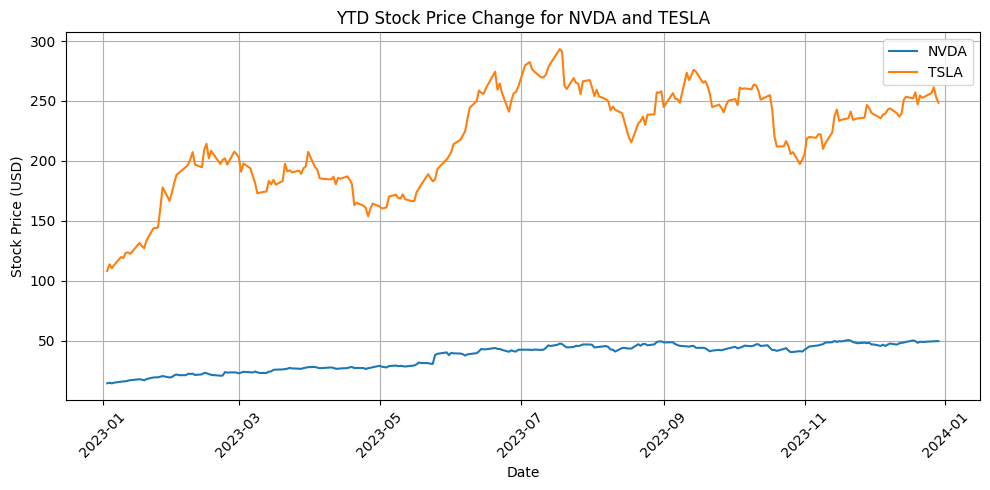

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbols
symbols = ['NVDA', 'TSLA']

# Fetch the stock data for the year to date
data = yf.download(symbols, start='2023-01-01', end='2023-12-31')['Close']

# Plot the data
plt.figure(figsize=(10, 5))
for symbol in symbols:
    plt.plot(data.index, data[symbol], label=symbol)

plt.title('YTD Stock Price Change for NVDA and TESLA')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**twoagent**

In [29]:
config_list = [
    {
        "model": "gpt-4o-mini",
        "api_key": api_key,
    }
]

llm_config = {
    "config_list": config_list,
}



In [30]:
assistant = AssistantAgent(
    name="assistant",
    llm_config=llm_config
)

user_proxy = UserProxyAgent(
    name="user_proxy",
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,
    },
    human_input_mode="NEVER"   # 자동으로 대화 진행
)

In [31]:
# 대화 시작 (YTD 주가 차트 요청)
user_proxy.initiate_chat(
    assistant,
    message="Plot a chart of NVDA and TESLA stock price change YTD.",
    max_turns=2  # 자동 종료를 위한 턴 수 제한
)

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of NVDA (NVIDIA) and TESLA (Tesla) stock price changes Year-To-Date (YTD), we will follow this plan:

1. Collect the YTD stock price data for both NVDA and TESLA. This will involve fetching the stock prices from a financial API.
2. Use the collected data to plot a chart comparing the two stock prices.

I will use the `yfinance` library to fetch the stock data and `matplotlib` to create the plot. First, let's create a Python script to accomplish this.

Please execute the following Python code to fetch the stock data and plot the graph.

```python
# filename: plot_stocks.py
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbols
symbols = ['NVDA', 'TSLA']

# Fetch the stock data for the year to date
data = yf.download(symbols, start='2023-01-01', end='2023-

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a chart of NVDA and TESLA stock price change YTD.', 'role': 'assistant', 'name': 'user_proxy'}, {'content': "To plot a chart of NVDA (NVIDIA) and TESLA (Tesla) stock price changes Year-To-Date (YTD), we will follow this plan:\n\n1. Collect the YTD stock price data for both NVDA and TESLA. This will involve fetching the stock prices from a financial API.\n2. Use the collected data to plot a chart comparing the two stock prices.\n\nI will use the `yfinance` library to fetch the stock data and `matplotlib` to create the plot. First, let's create a Python script to accomplish this.\n\nPlease execute the following Python code to fetch the stock data and plot the graph.\n\n```python\n# filename: plot_stocks.py\nimport yfinance as yf\nimport matplotlib.pyplot as plt\n\n# Define the stock symbols\nsymbols = ['NVDA', 'TSLA']\n\n# Fetch the stock data for the year to date\ndata = yf.download(symbols, start='2023-01-01', end='2023-12-31')['